# Imports and paths


In [101]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,  roc_auc_score, precision_score, recall_score, f1_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


In [102]:
data_path = 'data/alzheimers_disease_data.csv'
df = pd.read_csv(data_path)

# Data overview


First we need to differenciate between real numerical data annd categorical data encoded into numerical values, we can see that in the data overview available on the data page

Some of the columns have been encoded and don't reference real numerical data, we can see them in the documentation of the data:

- **Gender**: Gender of the patients coded as follows:
    - 0: Male
    - 1: Female
- **Ethnicity**: The ethnicity of the patients, coded as follows:
    - 0: Caucasian
    - 1: African American
    - 2: Asian
    - 3: Other
- **EducationLevel**: The education level of the patients, coded as follows:
    - 0: None
    - 1: High School
    - 2: Bachelor's
    - 3: Higher
- **Smoking**: Smoking status, coded as follows:
    - 0: No
    - 1: Yes
- **FamilyHistoryAlzheimers**: Family history of Alzheimer's Disease, coded as follows:
    - 0: No
    - 1: Yes
- **CardiovascularDisease**: Presence of cardiovascular disease, coded as follows:
    - 0: No
    - 1: Yes
- **Diabetes**: Presence of diabetes, coded as follows:
    - 0: No
    - 1: Yes
- **Depression**: Presence of depression, coded as follows:
    - 0: No
    - 1: Yes
- **HeadInjury**: History of head injury, coded as follows:
    - 0: No
    - 1: Yes
- **Hypertension**: Presence of hypertension, coded as follows:
    - 0: No
    - 1: Yes
- **MemoryComplaints**: Presence of memory complaints, coded as follows:
    - 0: No
    - 1: Yes
- **BehavioralProblems**: Presence of behavioral problems, coded as follows:
    - 0: No
    - 1: Yes
- **Confusion**: Presence of confusion, coded as follows:
    - 0: No
    - 1: Yes
- **Disorientation**: Presence of disorientation, coded as follows:
    - 0: No
    - 1: Yes
- **PersonalityChanges**: Presence of personality changes, coded as follows:
    - 0: No
    - 1: Yes
- **DifficultyCompletingTasks**: Presence of difficulty completing tasks, coded as follows:
    - 0: No
    - 1: Yes
- **Forgetfulness**: Presence of forgetfulness, coded as follows:
    - 0: No
    - 1: Yes
- **Diagnosis**: Diagnosis status for Alzheimer's Disease, coded as follows:
    - 0: No
    - 1: Yes


In [103]:
categorical_columns = [
    "Gender",
    "Ethnicity",
    "EducationLevel",
    "Smoking",
    "FamilyHistoryAlzheimers",
    "CardiovascularDisease",
    "Diabetes",
    "Depression",
    "HeadInjury",
    "Hypertension",
    "MemoryComplaints",
    "BehavioralProblems",
    "Confusion",
    "Disorientation",
    "PersonalityChanges",
    "DifficultyCompletingTasks",
    "Forgetfulness",
    "Diagnosis"
]

We know that in addition to these categorical columns, we have two more categorical columns, DoctorInCharge and PatientID, which may not contribute numerical information to the data. Therefore, to obtain the numerical columns, we need to exclude all of these.

In [104]:
exclude_columns = categorical_columns + ['DoctorInCharge','PatientID']
numerical_columns = df.columns.difference(exclude_columns).tolist()

numerical_columns

['ADL',
 'Age',
 'AlcoholConsumption',
 'BMI',
 'CholesterolHDL',
 'CholesterolLDL',
 'CholesterolTotal',
 'CholesterolTriglycerides',
 'DiastolicBP',
 'DietQuality',
 'FunctionalAssessment',
 'MMSE',
 'PhysicalActivity',
 'SleepQuality',
 'SystolicBP']

### Plain exploration

In [105]:
df

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,6895,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,...,0,0,4.492838,1,0,0,0,0,1,XXXConfid
2145,6896,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,...,0,1,9.204952,0,0,0,0,0,1,XXXConfid
2146,6897,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,...,0,0,5.036334,0,0,0,0,0,1,XXXConfid
2147,6898,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,...,0,0,3.785399,0,0,0,0,1,1,XXXConfid


In [106]:
print("SHAPE:",df.shape)
print("NUMBER OF INTEGER/FLOAT COLUMNS:", len(df.select_dtypes(exclude=['object']).columns))
print("NUMBER OF OBJECT COLUMNS:", len(df.select_dtypes(include=['object']).columns))

SHAPE: (2149, 35)
NUMBER OF INTEGER/FLOAT COLUMNS: 34
NUMBER OF OBJECT COLUMNS: 1


In [107]:
np.transpose(df[numerical_columns].describe())

,count,mean,std,min,25%,50%,75%,max
ADL,2149.0,4.982958,2.949775,0.001288,2.342836,5.038973,7.581490,9.999747
Age,2149.0,74.908795,8.990221,60.000000,67.000000,75.000000,83.000000,90.000000
AlcoholConsumption,2149.0,10.039442,5.757910,0.002003,5.139810,9.934412,15.157931,19.989293
BMI,2149.0,27.655697,7.217438,15.008851,21.611408,27.823924,33.869778,39.992767
CholesterolHDL,2149.0,59.463533,23.139174,20.003434,39.095698,59.768237,78.939050,99.980324
CholesterolLDL,2149.0,124.335944,43.366584,50.230707,87.195798,123.342593,161.733733,199.965665
CholesterolTotal,2149.0,225.197519,42.542233,150.093316,190.252963,225.086430,262.031657,299.993352
CholesterolTriglycerides,2149.0,228.281496,101.986721,50.407194,137.583222,230.301983,314.839046,399.941862
DiastolicBP,2149.0,89.847836,17.592496,60.000000,74.000000,91.000000,105.000000,119.000000
DietQuality,2149.0,4.993138,2.909055,0.009385,2.458455,5.076087,7.558625,9.998346


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

Let's see how many nulls and NaN there are in our data

In [109]:
for col in df.columns:
    null_count = df[col].isnull().sum()
    if null_count != 0:
        print(f'{col} has {null_count} null data')

In [110]:
for col in df.columns:
    null_count = df[col].isna().sum()
    if null_count != 0:
        print(f'{col} has {null_count} NaN data')

Let's see the correlation matrix with the numerical variables

<AxesSubplot:>

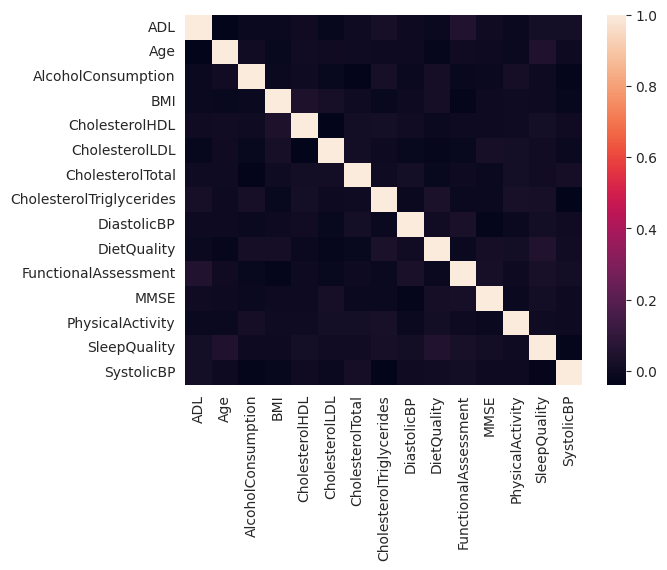

In [111]:
sns.heatmap(df[numerical_columns].corr())

As we can see there is no significant positives or negativs correlation between any variable

### Data-Viz

First we are going to explore the distribution of the values in the categorical data

In [112]:
num_plots = len(categorical_columns)
num_cols = 3
num_rows = math.ceil(num_plots / num_cols)

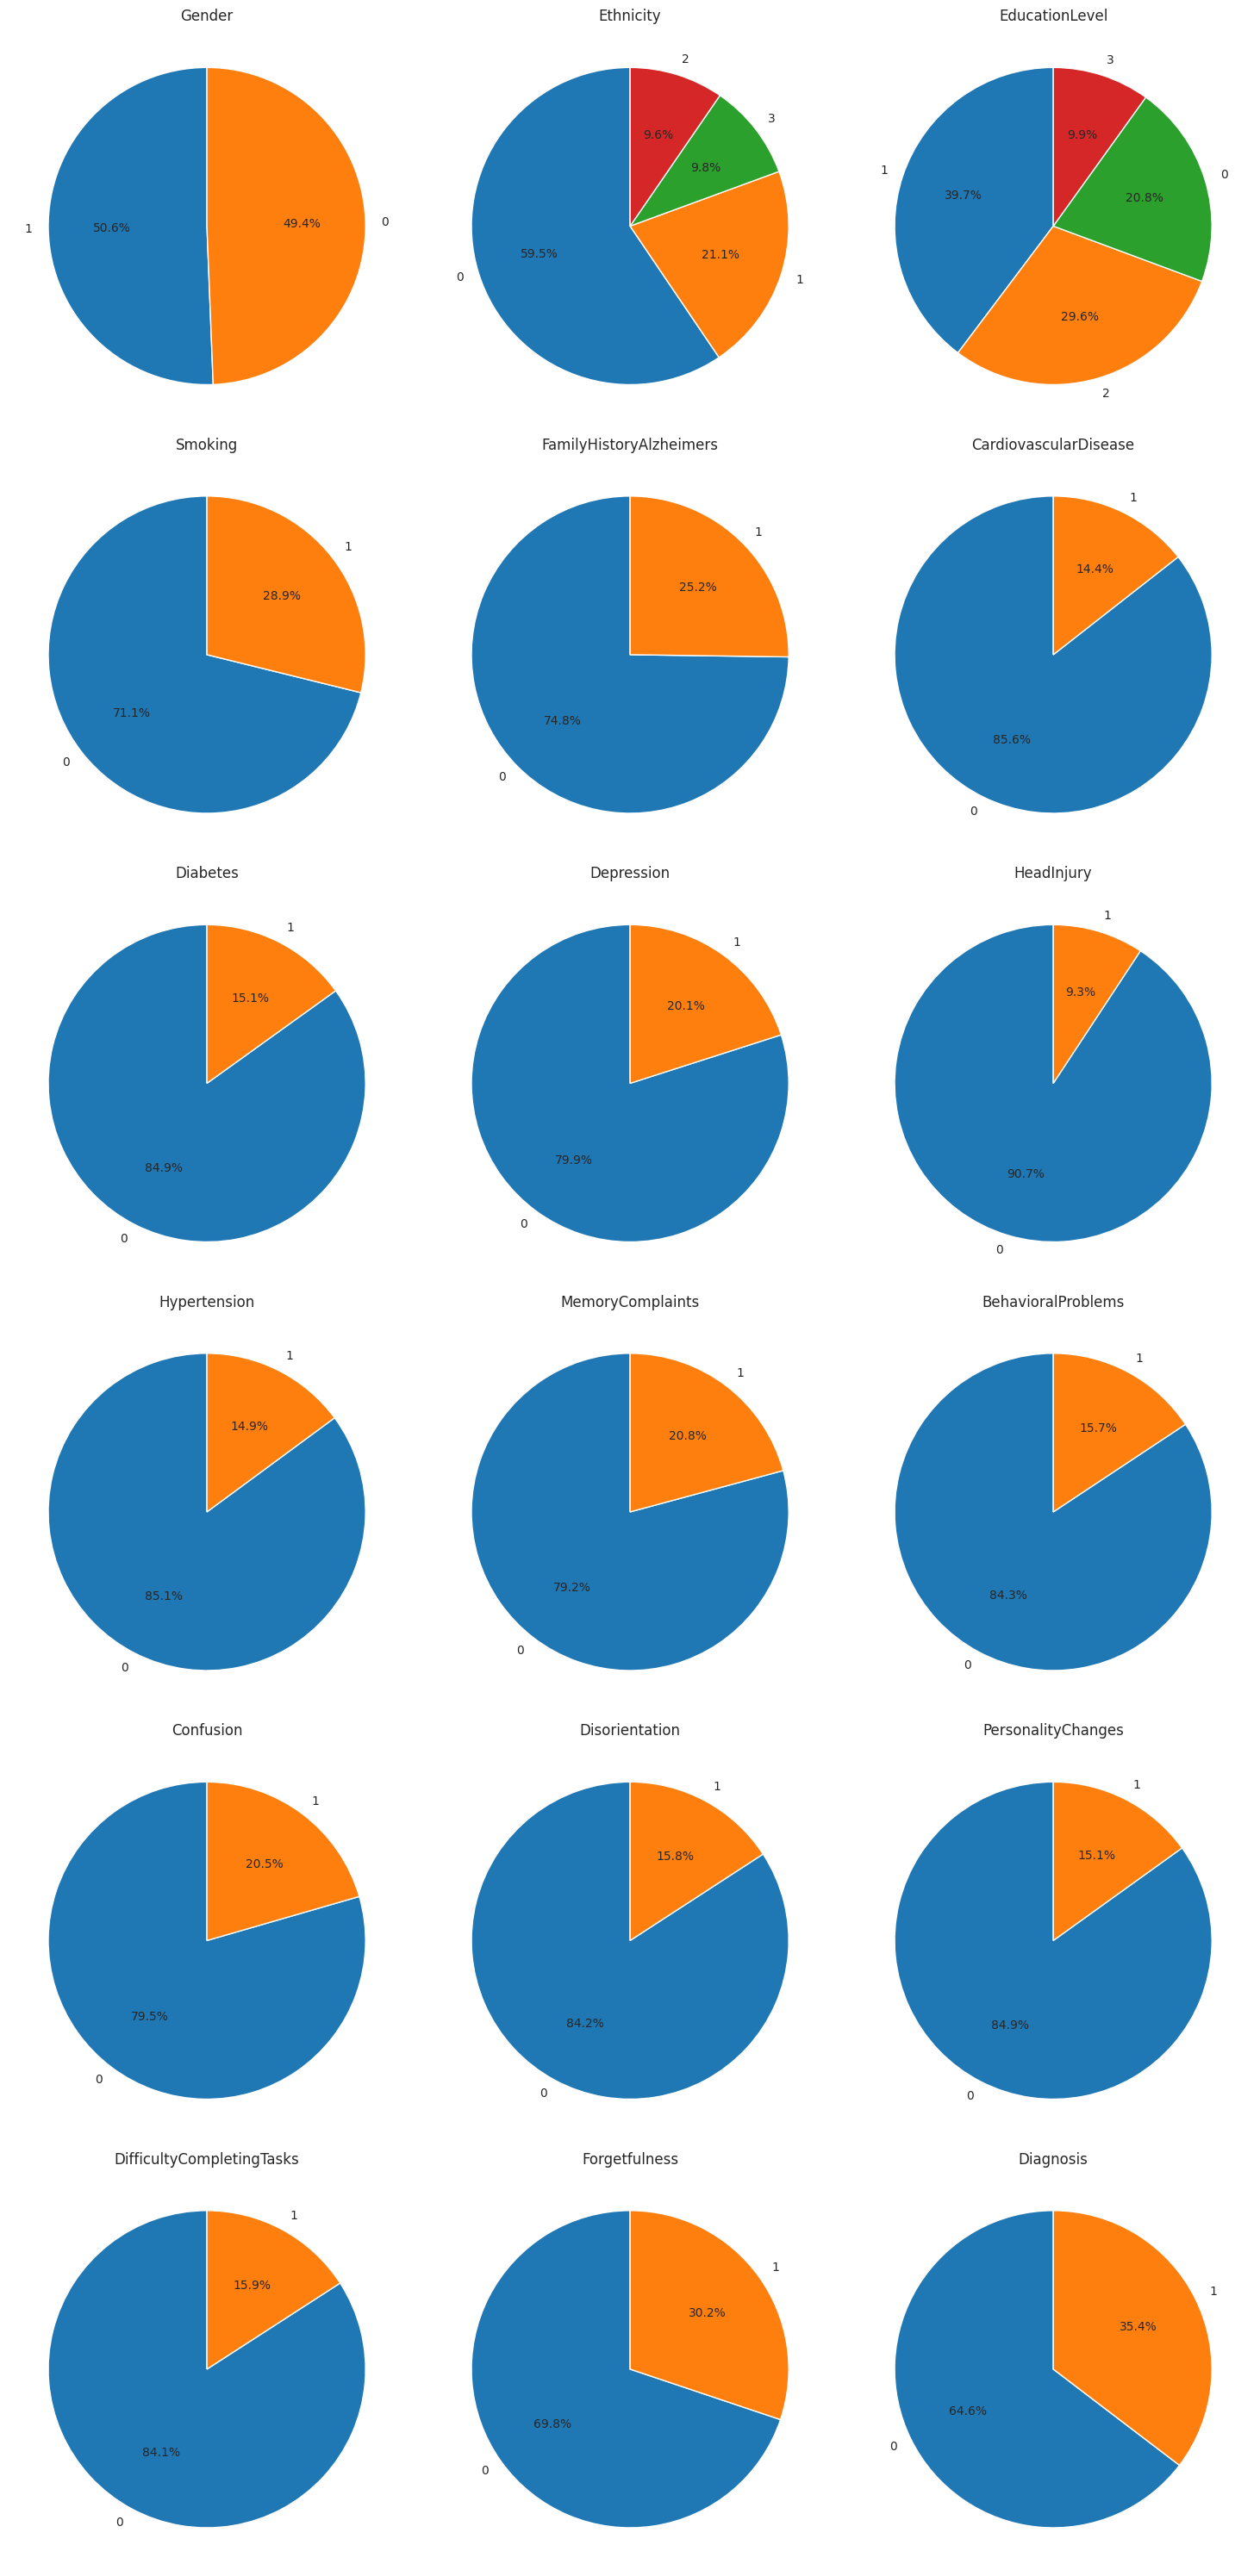

In [113]:
sns.set_style('whitegrid')

fig, axs = plt.subplots(num_rows,num_cols, figsize=(5*num_cols, 5*num_rows))
axs = axs.flatten()
for i, col in enumerate(categorical_columns):
    counts = df[col].value_counts()
    axs[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
    axs[i].set_ylabel('')
    axs[i].set_title(col)

plt.tight_layout()
plt.show()

Now we explore the numerical values and see how they're distributed, so first we get the min, max and mean of each column and then we plot some histograms

In [114]:
np.transpose(df[numerical_columns].describe())

,count,mean,std,min,25%,50%,75%,max
ADL,2149.0,4.982958,2.949775,0.001288,2.342836,5.038973,7.581490,9.999747
Age,2149.0,74.908795,8.990221,60.000000,67.000000,75.000000,83.000000,90.000000
AlcoholConsumption,2149.0,10.039442,5.757910,0.002003,5.139810,9.934412,15.157931,19.989293
BMI,2149.0,27.655697,7.217438,15.008851,21.611408,27.823924,33.869778,39.992767
CholesterolHDL,2149.0,59.463533,23.139174,20.003434,39.095698,59.768237,78.939050,99.980324
CholesterolLDL,2149.0,124.335944,43.366584,50.230707,87.195798,123.342593,161.733733,199.965665
CholesterolTotal,2149.0,225.197519,42.542233,150.093316,190.252963,225.086430,262.031657,299.993352
CholesterolTriglycerides,2149.0,228.281496,101.986721,50.407194,137.583222,230.301983,314.839046,399.941862
DiastolicBP,2149.0,89.847836,17.592496,60.000000,74.000000,91.000000,105.000000,119.000000
DietQuality,2149.0,4.993138,2.909055,0.009385,2.458455,5.076087,7.558625,9.998346


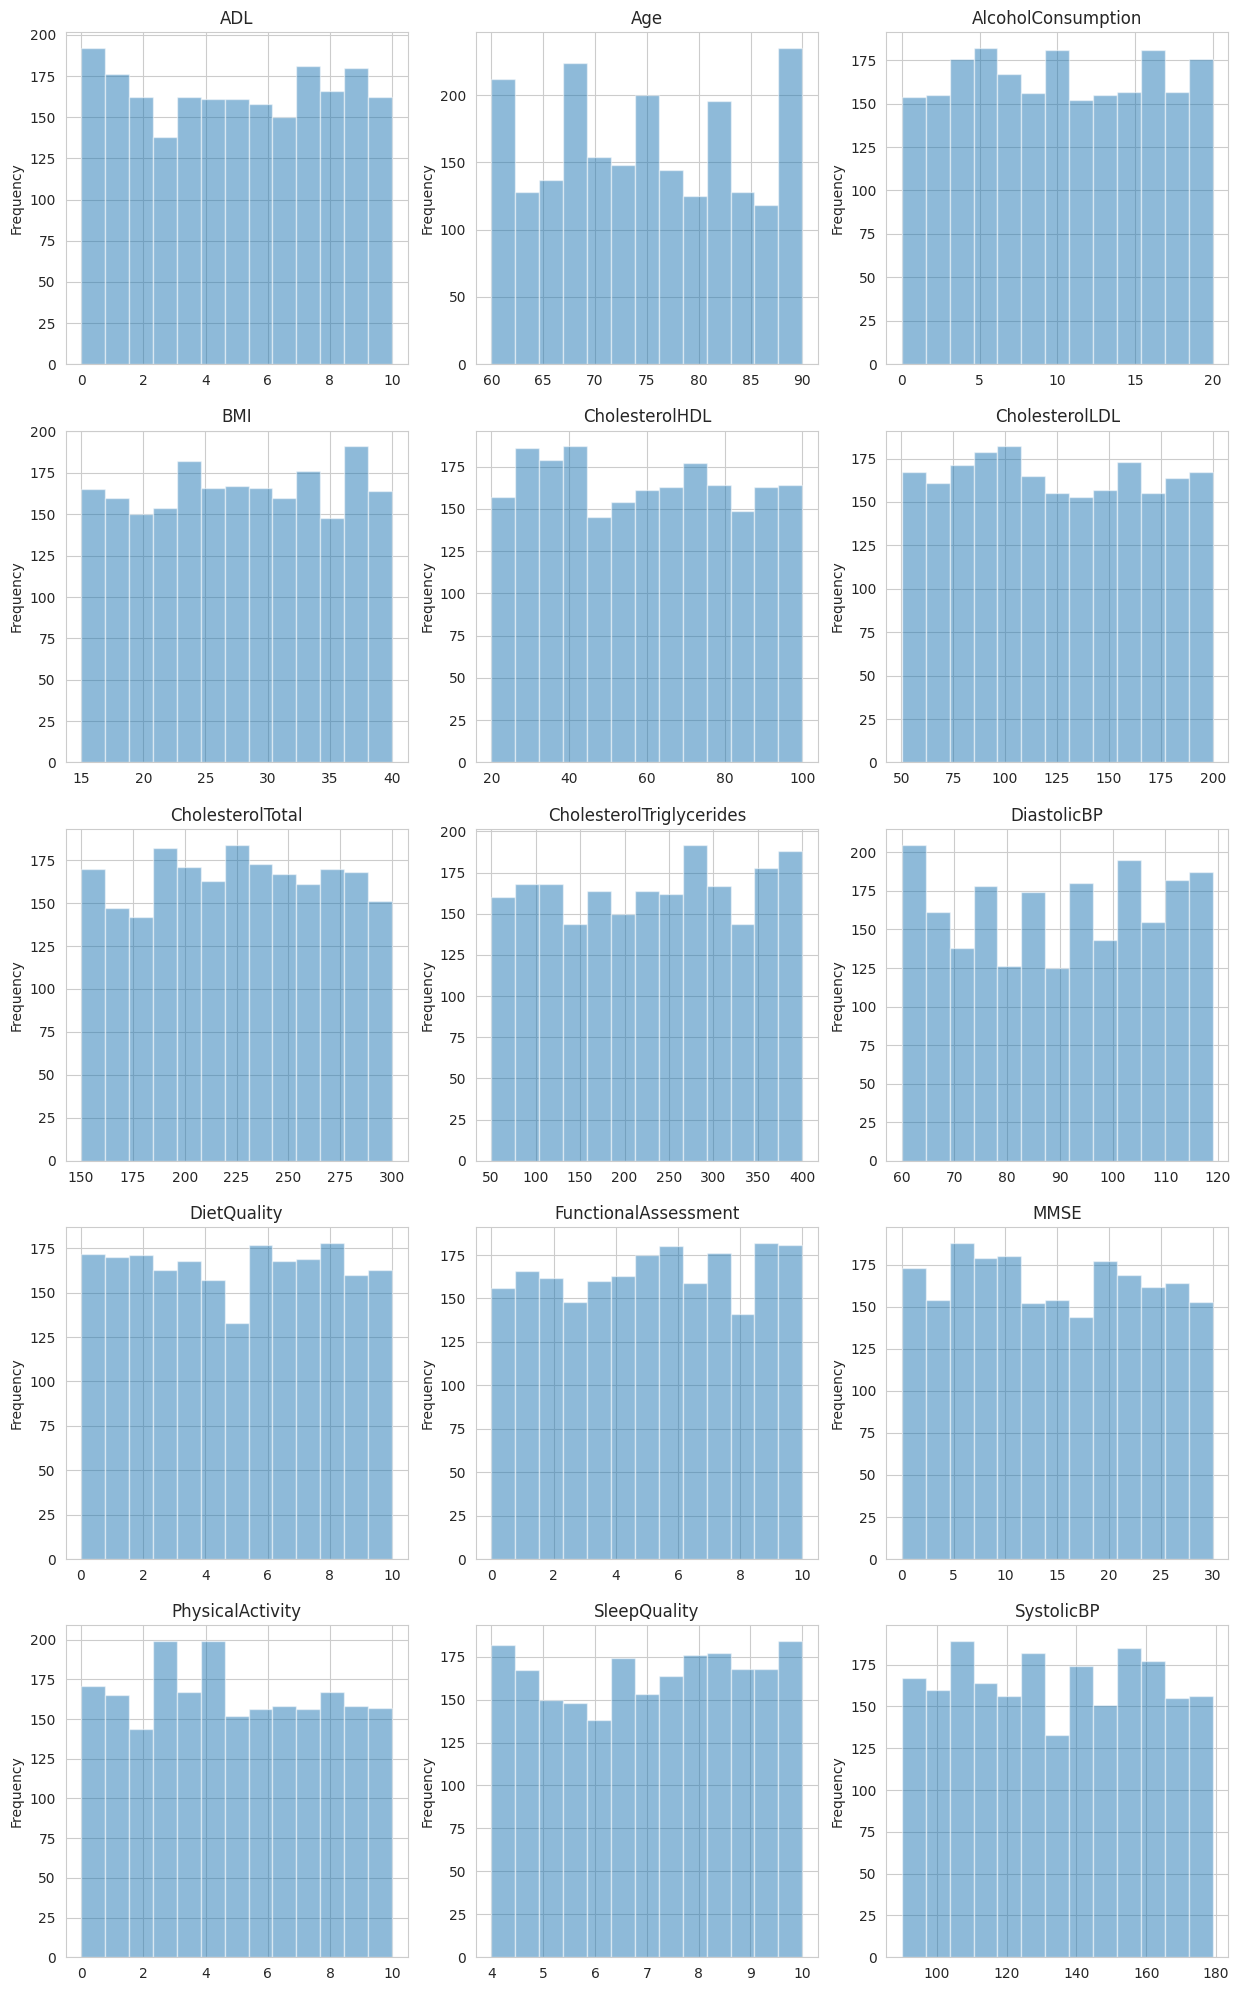

In [115]:
num_plots = len(numerical_columns)
num_cols = 3
num_rows = math.ceil(num_plots / num_cols)
sns.set_style('whitegrid')

fig, axs = plt.subplots(num_rows,num_cols, figsize=(5*num_cols, 5*num_rows))
axs = axs.flatten()

for i,col in enumerate(numerical_columns):
    bins = int(np.ceil(np.log2(len(df[col])) + 1))
    df[col].plot.hist(bins=bins, alpha=0.5,ax=axs[i])
    axs[i].set_ylabel('Frequency')
    axs[i].set_xlabel('')
    axs[i].set_title(col)

We've seen now that the numerical data tends to distribute itself regularly and there are not clear holes in the values.

# Preprocessing

Now we need to start preprocessing the data to create a model that predicts the output correctly. We begin by normalizing the numerical data. But before that, we need to define our target variable and the train and test splits. In this case, the target variable would be the 'Diagnosis' variable, which indicates whether the patient has been diagnosed with Alzheimer's or not.


In [116]:
cat_cols = [
    "Gender",
    "Ethnicity",
    "EducationLevel",
    "Smoking",
    "FamilyHistoryAlzheimers",
    "CardiovascularDisease",
    "Diabetes",
    "Depression",
    "HeadInjury",
    "Hypertension",
    "MemoryComplaints",
    "BehavioralProblems",
    "Confusion",
    "Disorientation",
    "PersonalityChanges",
    "DifficultyCompletingTasks",
    "Forgetfulness"
]


num_cols = ['ADL',
 'Age',
 'AlcoholConsumption',
 'BMI',
 'CholesterolHDL',
 'CholesterolLDL',
 'CholesterolTotal',
 'CholesterolTriglycerides',
 'DiastolicBP',
 'DietQuality',
 'FunctionalAssessment',
 'MMSE',
 'PhysicalActivity',
 'SleepQuality',
 'SystolicBP']

In [117]:
y = df[['Diagnosis']]
df.drop(columns=['Diagnosis'], inplace=True)
X = df[num_cols + cat_cols]
X_train_og, X_test_og, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

We don't need to fill NaN values because we checked earlier, and the dataframe has none. Now that we have divided the data into train and test sets, we are going to try multiple classifiers to select the best one with the optimal feature selection.

In [118]:
classifiers = {
    "DecisionTree":DecisionTreeClassifier(),
    "RandomForest":RandomForestClassifier(random_state=42),
    "SVC": SVC(kernel='linear', probability=True),
    "LogisticRegression":LogisticRegression()
}

We can try some scaling for the numerical data.

In [119]:
scaler = StandardScaler()
X_train = X_train_og.copy()
X_test = X_test_og.copy()
X_train[num_cols] = scaler.fit_transform(X_train_og[num_cols])
X_test[num_cols] = scaler.transform(X_test_og[num_cols])

Now, let's define some functions that will help us select the best features and the best classifier.

In [120]:
def select_features(clf,n_features):
    #Select Features
    selector = RFE(clf, n_features_to_select=n_features, step=1)
    selector = selector.fit(X_train, y_train)
    ranking_df = pd.DataFrame({'Feature': X.columns, 'Ranking': selector.ranking_})
    imp_cols = ranking_df[ranking_df['Ranking']==1]['Feature'].to_list()
    return imp_cols

def test_metrics(clf, imp_cols, n_features, name):
    #Test Performance
    clf.fit(X_train[imp_cols],y_train)
    y_pred_proba = clf.predict_proba(X_test[imp_cols])[:, 1]
    auc = roc_auc_score(y_test, y_pred_proba)
    y_pred =  clf.predict(X_test[imp_cols])
    f1 = f1_score(y_pred=y_pred, y_true=y_test)
    accuracy = accuracy_score(y_pred=y_pred, y_true=y_test)
    recall = recall_score(y_pred=y_pred, y_true=y_test)
    precision = precision_score(y_pred=y_pred, y_true=y_test)

    return {"N_Features":n_features,"Classifier":name,"Features":imp_cols,"AUC":auc,"Accuracy":accuracy,"Recall":recall,"Precision":precision,"F1":f1}

In [122]:
results = []

for name, clf in classifiers.items():
    for n_features in range(1,10):
        imp_cols = select_features(clf,n_features)
        results.append(test_metrics(clf,imp_cols,n_features,name))

results_df = pd.DataFrame(results, columns= ["N_Features","Classifier","Features","AUC","Accuracy","Recall","Precision","F1"])
results_df.to_csv("results_classifiers.csv",sep=";",header=True, index=False)

/home/nachmz42/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/nachmz42/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/nachmz42/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/nachmz42/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklea

We can store the results in an external CSV, but it's not mandatory. Next, we are going to explore the results and select the best option.

In [126]:
results_df.sort_values(by="AUC",ascending=False)


,N_Features,Classifier,Featrues,AUC,Accuracy,Recall,Precision,F1
15,7,RandomForest,"[ADL, DietQuality, FunctionalAssessment, MMSE,...",0.972675,0.959752,0.923729,0.964602,0.943723
14,6,RandomForest,"[ADL, FunctionalAssessment, MMSE, PhysicalActi...",0.971869,0.959752,0.923729,0.964602,0.943723
13,5,RandomForest,"[ADL, FunctionalAssessment, MMSE, MemoryCompla...",0.970959,0.959752,0.923729,0.964602,0.943723
16,8,RandomForest,"[ADL, CholesterolTriglycerides, DietQuality, F...",0.969161,0.953560,0.906780,0.963964,0.934498
17,9,RandomForest,"[ADL, CholesterolHDL, CholesterolTriglycerides...",0.966990,0.956656,0.915254,0.964286,0.939130
7,8,DecisionTree,"[ADL, CholesterolHDL, DietQuality, FunctionalA...",0.925920,0.928793,0.915254,0.892562,0.903766
6,7,DecisionTree,"[ADL, CholesterolHDL, DietQuality, FunctionalA...",0.921683,0.925697,0.906780,0.891667,0.899160
4,5,DecisionTree,"[ADL, FunctionalAssessment, MMSE, MemoryCompla...",0.920525,0.928793,0.889831,0.913043,0.901288
31,5,LogisticRegression,"[ADL, FunctionalAssessment, MMSE, MemoryCompla...",0.917859,0.842105,0.728814,0.819048,0.771300
22,5,SVC,"[ADL, FunctionalAssessment, MMSE, MemoryCompla...",0.916122,0.839009,0.728814,0.811321,0.767857


We have chosen the AUC score to select our classifier, and as we can see in the results dataframe, the best classifier was RandomForest using 7 features. It also has other good metrics, so there is no need to keep exploring, although there is always some room for improvement. With this feature selection method, we have used only 7 out of the 33 total features, saving time and resources in the training process.